# Assignment 1 - tasks to be completed

1) Write an algorithm to compute the factorial of a positive integer n

2) For different values of n, implement your algorithm using two approaches: iterative and recursive (tail and non-tail
recursions). For each case, plot running time as a function of n and compare the achieved results

3) Use one of the sequences obtained from task 2 as an input for search algorithms. Implement with two methods from: linear search, iterative binary and recursive binary

4) For each approach, compute the best and worst running times. Give some examples by plotting the running time as a function of n

5) Use curve-fitting algorithms to find the equation of the running times obtained from Tasks 2-4. 

# Introduction

This notebook examines the efficiency of algorithms by monitoring their runtimes. The notebook structure follows the five assignment tasks that are to be implemented (can be seen above). Each section is clearly labelled with the question number followed by task title. Some questions have been separated into different sections. For example, Question 2 is answered in sections 2.1, 2.2, 2.3 & 2.3. In section 4.1 and 4.2, the same code is being used but the algorithms are working on different sequences. As expected, the graphs plotted in these sections mirror eachother so for this reason, analysis is only done on section 4.1. There was no need to include the graphs of section 4.2 in section 5 either. 

In order to plot the running times of the algorithms, the following approach has been used throughout the notebook:

<code>
from time import time
start_time = time()
run algorithm
end_time = time()
elapsed_time = end_time - start_time
</code>
    
This approach was adapted from the textbook "Data Structures & Algorithms in Python" by Goodrich, Tamassisa and Goldwasser. In order to analyse the runtimes multiple times, this has been completed with a for loop and the average has then been computed.

# Q1 Algorithm to compute the factorial of a positive integer n

(adapted from lecture 5 notes)

<code>
Input: n, a natural number 
Output: the nth factorial number 
if n = 1 or n = 0 then 
    return 1 
else return n * factorial(n - 1) 
endif
<code>

# Q2 For different values of n, implement your algorithm using two approaches: iterative and recursive (tail and non-tail recursions). For each case, plot running time as a function of n and compare the achieved results.

In [1]:
import unittest
import sys
from time import time
import matplotlib.pyplot as plt
import random
import numpy as np
from matplotlib import pyplot
from scipy.optimize import curve_fit

## 2.1 Implementing the Algorithms

In [2]:
#factorial with iterative approach
#Pseudocode is in Section 1

def factorial_iterative(n) :
    
    if n == 1 or n == 0:
        return 1
    else :
        fact = n
    
        while n > 1 :
            n = n - 1
            fact = fact * n
        return fact

<b>Factorial Non-Tail Recursion Pseudocode:</b>

(adapted from Lecture 6 slides)

Input: n, a natural number <br>
Output: the nth factorial number

<code>
if n = 1 or n = 0 then
    return 1
else 
    return factorial_non_tail(n - 1)
endif
<code>

In [3]:
#non-tail recursion

def factorial_non_tail(n) :
    if n == 1 or n == 0:
        return 1
    else :
        return n * factorial_non_tail(n - 1)

<b> Factorial Tail Recursion Pseudocode: </b>

(adapted from Lecture 6 slides)

Input: n, a natural number <br>
Output: the nth factorial number

<code>
if n = 1 then
    return accumulator
else 
    return factorial_tail(n - 1, n * accumulator)
endif
<code>

In [4]:
#tail recursion

def factorial_tail(n, acc = 1) :
    
    if n == 1 or n == 0 :
        return acc
    else :
        return factorial_tail(n - 1, n*acc)
    

In [5]:
#unittests for each of the factorial functions:

class Test_factorial_iterative(unittest.TestCase):
    
    def test_1(self):
        self.assertTrue(factorial_iterative(2), 4)
        
    def test_2(self):
        self.assertTrue(factorial_iterative(4), 24)
        
    def test_3(self):
        self.assertTrue(factorial_iterative(5), 120)
        
class Test_factorial_nontail_iterative(unittest.TestCase):
    
    def test_1(self):
        self.assertTrue(factorial_non_tail(2), 4)
        
    def test_2(self):
        self.assertTrue(factorial_non_tail(4), 24)
        
    def test_3(self):
        self.assertTrue(factorial_non_tail(5), 120)
        
class Test_factorial_tail(unittest.TestCase):
    
    def test_1(self):
        self.assertTrue(factorial_tail(2), 4)
        
    def test_2(self):
        self.assertTrue(factorial_tail(4), 24)
        
    def test_3(self):
        self.assertTrue(factorial_tail(5), 120)
    
unittest.main(argv=[''], verbosity=2, exit=False)



test_1 (__main__.Test_factorial_iterative) ... ok
test_2 (__main__.Test_factorial_iterative) ... ok
test_3 (__main__.Test_factorial_iterative) ... ok
test_1 (__main__.Test_factorial_nontail_iterative) ... ok
test_2 (__main__.Test_factorial_nontail_iterative) ... ok
test_3 (__main__.Test_factorial_nontail_iterative) ... ok
test_1 (__main__.Test_factorial_tail) ... ok
test_2 (__main__.Test_factorial_tail) ... ok
test_3 (__main__.Test_factorial_tail) ... ok

----------------------------------------------------------------------
Ran 9 tests in 0.031s

OK


In [6]:
#from lecture 5
#checking to see max system will allow - will use less than this number for analysis

sys.getrecursionlimit()

3000

## 2.2 Runtimes of Factorial Algorithms - not average

The runtimes for the factorial algorithms were first computed based off one instance of the algorithm working through the sequence.

In [7]:
def function_running_time(func):
    
    n_values = []   #making list of values that will be inputted into the factorial function
    for i in range(1000):
        n_values.append(i)
    time_taken = []     #empty list that will be used to record the time it took on each integer value 
    for i in n_values :      #for loop to iterate through the values
        start_time = time()    #starting the timer
        func(i)      #parameter of the function - where the function implemented will compute factorial
        end_time = time()    #stop the timer
        elapsed_time = end_time - start_time    #calculating elapsed time
        time_taken.append(elapsed_time)    #Adding this to the time_taken list
    return time_taken

In [8]:
#Each of the factorial functions going through above function

iterative_time_list = function_running_time(factorial_iterative)
non_tail_recursion_time_list = function_running_time(factorial_non_tail)
tail_recursion_time_list = function_running_time(factorial_tail)


#copy of this list has been made for the graphs for question 4
tail_recursion_time_list_graph = tail_recursion_time_list.copy()

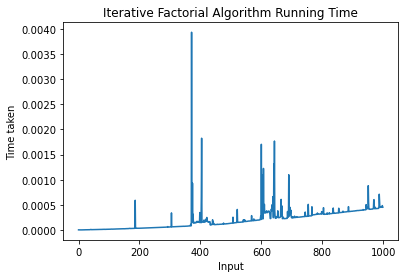

In [9]:
n_values = []

for i in range(1000):
    n_values.append(i)

plt.xlabel('Input')
plt.ylabel('Time taken')
plt.title('Iterative Factorial Algorithm Running Time')
plt.plot(n_values, iterative_time_list)


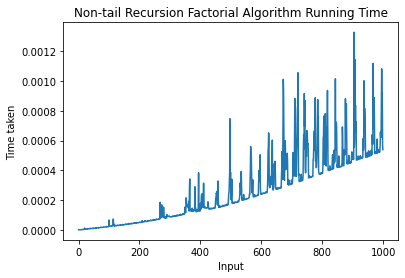

In [10]:
plt.xlabel('Input')
plt.ylabel('Time taken')
plt.title('Non-tail Recursion Factorial Algorithm Running Time')
plt.plot(n_values, non_tail_recursion_time_list)

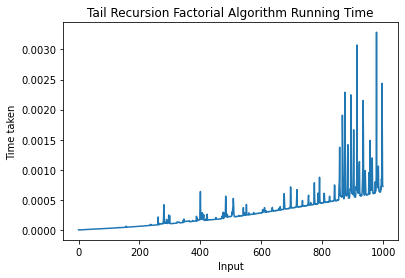

In [11]:
plt.xlabel('Input')
plt.ylabel('Time taken')
plt.title('Tail Recursion Factorial Algorithm Running Time')
plt.plot(n_values, tail_recursion_time_list)

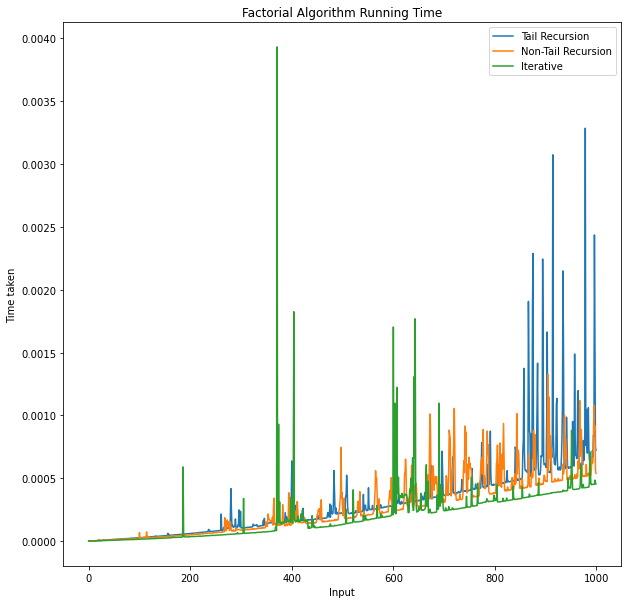

In [12]:
plt.figure(figsize=(10,10))
plt.xlabel('Input')
plt.ylabel('Time taken')
plt.title('Factorial Algorithm Running Time')
plt.plot(n_values, tail_recursion_time_list, label='Tail Recursion')
plt.plot(n_values, non_tail_recursion_time_list, label='Non-Tail Recursion')
plt.plot(n_values, iterative_time_list, label='Iterative')
plt.legend()

There are a number of spikes clearly visible in the data here. In order to generate more consistent and reliable results, the next section (2.3) shows the algorithm running multiple times on the same integer value and then generating the average runtimes. Comparison and analysis of these three algorithms has been done in section 2.3.

## 2.3 Average Runtimes of Factorial Algorithms 

Below, the same algorithms are experimented with - this time taking the <b>average</b> runtimes. The average has been computed by checking the runtime for each n value 500 times. For each n value, the time is taken is added to a variable which is then divided by 500 to calculate the average.

In [13]:
def average_running_time(func):   
    
    n_values = []
    for i in range(1000):
        n_values.append(i)
    time_taken = []
    #x = 0
    #sum_time = 0
    for i in n_values :
        sum_time = 0      #setting the variable to 0 as the loop goes onto the next value
        for x in range(500):    #each n_value will go through the function 500 times
            start_time = time()
            func(i)
            end_time = time()
            elapsed_time = end_time - start_time
            sum_time = sum_time + elapsed_time    #the time taken each time is being added to the variable sum_time
            #x = x + 1
        average_time = sum_time / 500    #to get the average time taken, divide by 500
        time_taken.append(average_time)   #add this average to the time_taken list
    return time_taken

In [14]:
#takes a while for this to load!

iterative_average_time_list = average_running_time(factorial_iterative)
non_tail_average_recursion_time_list = average_running_time(factorial_non_tail)
tail_average_recursion_time_list = average_running_time(factorial_tail)

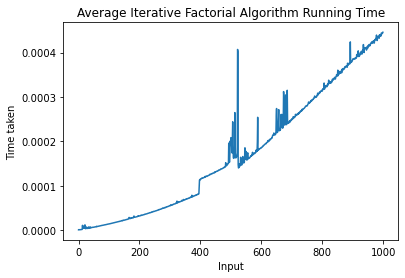

In [15]:
n_values = []

for i in range(1000):
    n_values.append(i)

plt.xlabel('Input')
plt.ylabel('Time taken')
plt.title('Average Iterative Factorial Algorithm Running Time')
plt.plot(n_values, iterative_average_time_list)

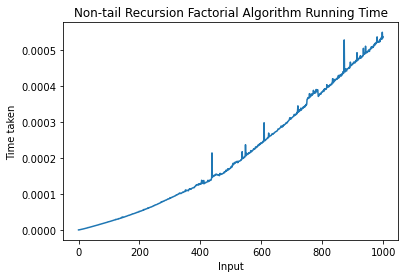

In [16]:
plt.xlabel('Input')
plt.ylabel('Time taken')
plt.title('Non-tail Recursion Factorial Algorithm Running Time')
plt.plot(n_values, non_tail_average_recursion_time_list)

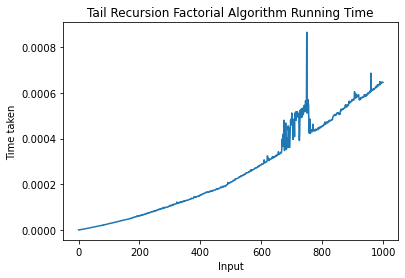

In [17]:
plt.xlabel('Input')
plt.ylabel('Time taken')
plt.title('Tail Recursion Factorial Algorithm Running Time')
plt.plot(n_values, tail_average_recursion_time_list)

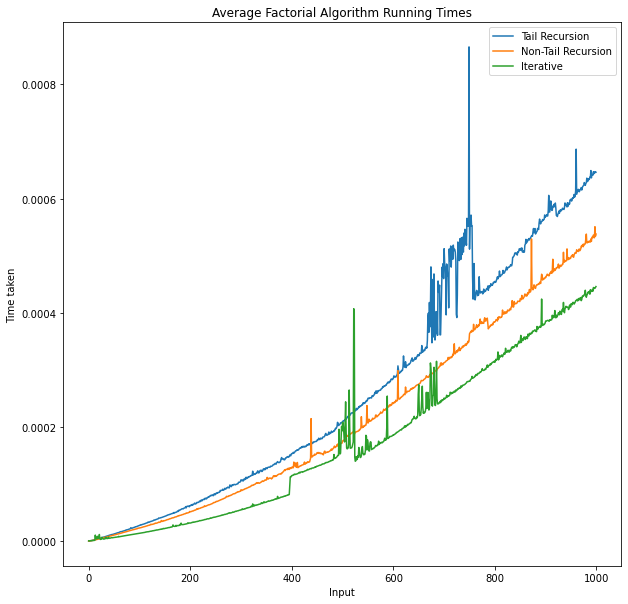

In [18]:
plt.figure(figsize=(10,10))
plt.xlabel('Input')
plt.ylabel('Time taken')
plt.title('Average Factorial Algorithm Running Times')
plt.plot(n_values, tail_average_recursion_time_list, label='Tail Recursion')
plt.plot(n_values, non_tail_average_recursion_time_list, label='Non-Tail Recursion')
plt.plot(n_values, iterative_average_time_list, label='Iterative')
plt.legend()

## 2.4 Discussion of the three runtimes: 

Running each <code>n_value</code> through the for loop 500 times and computing the average results in far less drastic spikes in the graphs. While, there does appear to still  be a few, particulary with tail recursion for the values at approx 620 - 750, these could be down to other processes running in the background in the kernel. Further improvements could be made by running each <code>n_value</code> through the sequence for more than 500 times. Due to the long wait time it took to calculate the average based on 500 instances for each number, this is why this wasn't carried out in this investigation.

In terms of the runtimes of the three algorithms:

* Iterative appears to have been the have been the faster as the value of n increases with the exception of the odd spike.

* Non-Tail recursion had the second fastest run time.

* Tail recursion was the slowest and appeared to be getting increasingly slower from approx 850 onwards.

These were surprising results as generally tail recursion has been found to be more efficient than non-tail recursion. This is because in tail recursion, the recursive calls do not need to be added to the call stack, instead there is just one, the current call in the stack.

All three algorithms have <em>O</em>(n) complexity given that the time to compute the factorial is proportional to the value of n. The relatively linear lines in each of the graphs support this.

In terms of Big-O Space Complexity; the iterative and tail recursion algorithms are <em>O</em>(1) complexity as in neither of these algorithms are the calls added to a stack. Non-Tail recursion does add calls to a stack (hence the stack is holding the the variables of n. Non-tail recursion Big-O space complexity is therefore <em>O</em>(n).
    

# Q3 Use one of the sequences obtained from task 2 as an input for search algorithms. Implement with two methods from: linear search, iterative binary and recursive binary

I was unsure what sequence was to be used here. Hence, three sequences have been used from this section onwards for different purposes:<br>
<br>
    1) For testing the search algorithms implemented, their reliability has been established with the list of times generated from the tail recursion factorial algorithm in section 2. These times have been stored in the <code>tail_recursion_time_list</code> variable.<br>
    <br>
    2) Section 4 uses n values that were inputted into the factorial algorithms as well as the sequence of results from the factorial results. This is discussed at the beginning of Section 4.<br>

---

For 3.1, the sequence of runtimes obtained from tail recursion function above has been used. This sequence has been applied to the search algorithms (linear and iterative binary) to confirm they are working as they should by checking the indices returned are the same and by employing unittests. In order for this sequence to work with the binary search function, it has been sorted and duplicates (if any) were removed as this could otherwise show inconsistencies with the indices returned from the linear and binary searches for the same number.

Linear search is the process of going through each element in a sequence starting from index 0 and checking if an element matches the target. Once it does, the index of the target value is returned.

Binary search is comparing the middle value to the target value. If they are not equal, the half where the target cannot be is eliminated and the process repeats on the half that has been kept. The middle value of this new sequence is compared to the target value and so on until the target is found. For binary search to work, the sequence must be ordered.

## 3.1 Implementing the Search Algorithms

<b> Linear Search Pseudocode: </b> <br>
    
Input: An array and target element that is to be searched for <br>
Output: Index of the element in the array or else return False <br>


<code>for i in range n : 
    if index i in array = target: 
        return target 
        return True 
    else : 
       return False 
</code>

In [19]:
#linear search

def linear_search(list, target): 
    for i in range(len(list)): #for each element in the list up to the length of the list
        if list[i] == target:  #if the list element is the same as the target:
            return i           #return the index
            return True
    else :                     #if the element is not in the list
        return False           #return False

<b>Binary Search Pseudocode:</b> <br>

<code>Input: A sorted array (in this instance called 'myarray') and an element to be searched for ('elem' in this instance) 
    
Output: the index of elem in the array or if not found -1

low < 0 
high < n - 1 

while(low <= high) do 
    mid < (low + high) / 2 
    if myarray[mid] > elem then 
        high < mid - 1 
    else 
    if myarray[mid] < elem then 
        low < mid + 1 
    else 
        return mid 
    endif 
return - 1 
</code>   
 

In [20]:
#iterative binary search
#adapted from lab 1


def binary_search(list, target):  #binary search function
    mid = 0                       #defining the variables
    low = 0
    high = len(list) - 1
    
    while(low <= high):
        mid = (low + high) // 2             
        if list[mid] > target:   #if list element at middle of the list, is greater than target element
            high = mid - 1       # the high variable becomes value of the index of the middle of the list less 1 
        elif list[mid] < target: #else, if in other half and targer is greater than midpoint element
            low = mid + 1        #the new low is the index of the list + 1
        else:
             return mid          #else, the middle variable is the target and return the index

    return -1                    #return -1 if not in list at all

## 3.2 Testing the Search Algorithms 

<em>"To implement binary search, the selected runtime sequence will need to be sorted.  Once it is ordered, generate some random numbers in the range of the length of the sequence and extract the values at those indices.  This is to guarantee that some values for your search are definitely in the list.  The chosen search algorithms should be given the same sequence and target values."</em>

This has been completed below as well as by using unittests.

In [21]:
#list needs to be sorted for binary search
#print(tail_recursion_time_list)
#print(len(tail_recursion_time_list_graph))
tail_recursion_time_list.sort()

#need to remove duplicates, otherwise the binary and linear search algorithm show different indices.
tail_recursion_time_list = list(dict.fromkeys(tail_recursion_time_list))


In [22]:
#checking to see the search algorithms are working
#do it 3 times for a different random number

#random_number = random.choice(tail_recursion_time_list)

length_of_list = len(tail_recursion_time_list)   #getting length of the list

print("Index of the first number: ")
random_integer_1 = random.choice(range(length_of_list))   #getting a random integer in the range of length of list
print(random_integer_1)

extract_at_index_no1 = tail_recursion_time_list[random_integer_1]   #first random integer selected
print("The first target value:")
print(extract_at_index_no1)
print("\n")

print("Index of the second number:")
random_integer_2 = random.choice(range(length_of_list))
print(random_integer_2)

print("The second target value:")
extract_at_index_no2 = tail_recursion_time_list[random_integer_2]
print(extract_at_index_no2)
print("\n")

print("Index of the third number:")
random_integer_3 = random.choice(range(length_of_list))
print(random_integer_3)

print("The third target value:")
extract_at_index_no3 = tail_recursion_time_list[random_integer_3]
print(extract_at_index_no3)

Index of the first number: 
206
The first target value:
0.00013709068298339844


Index of the second number:
511
The second target value:
0.0004286766052246094


Index of the third number:
346
The third target value:
0.00026607513427734375


In [23]:
#checking that same indices are being returned

linear_search(tail_recursion_time_list, extract_at_index_no1)

206

In [24]:
binary_search(tail_recursion_time_list, extract_at_index_no1)

206

In [25]:
linear_search(tail_recursion_time_list, extract_at_index_no2)

511

In [26]:
binary_search(tail_recursion_time_list, extract_at_index_no2)

511

In [27]:
linear_search(tail_recursion_time_list, extract_at_index_no3)

346

In [28]:
binary_search(tail_recursion_time_list, extract_at_index_no3)

346

In [29]:
if random_integer_1 == linear_search(tail_recursion_time_list, extract_at_index_no1):
    print("True, test passed")
else :
    print("False, test failed")
    
if random_integer_1 == binary_search(tail_recursion_time_list, extract_at_index_no1):
    print("True, test passed")
else :
    print("False, test failed") 
    
if random_integer_2 == linear_search(tail_recursion_time_list, extract_at_index_no2):
    print("True, test passed")
else :
    print("False, test failed")
    
if random_integer_2 == binary_search(tail_recursion_time_list, extract_at_index_no2):
    print("True, test passed")
else :
    print("False, test failed")
    
if random_integer_3 == linear_search(tail_recursion_time_list, extract_at_index_no3):
    print("True, test passed")
else :
    print("False, test failed")
    
if random_integer_3 == binary_search(tail_recursion_time_list, extract_at_index_no3):
    print("True, test passed")
else :
    print("False, test failed")


True, test passed
True, test passed
True, test passed
True, test passed
True, test passed
True, test passed


In [30]:
#unittests

class Test_linear_search(unittest.TestCase):
    
    def test_1(self):
        self.assertTrue(linear_search(tail_recursion_time_list, extract_at_index_no1), random_integer_1)
        
    def test_2(self):
        self.assertTrue(linear_search(tail_recursion_time_list, extract_at_index_no2), random_integer_2)
        
    def test_3(self):
        self.assertTrue(linear_search(tail_recursion_time_list, extract_at_index_no3), random_integer_3)
        
class Test_binary_search(unittest.TestCase):
    
    def test_1(self):
        self.assertTrue(binary_search(tail_recursion_time_list, extract_at_index_no1), random_integer_1)
        
    def test_2(self):
        self.assertTrue(binary_search(tail_recursion_time_list, extract_at_index_no2), random_integer_2)
        
    def test_3(self):
        self.assertTrue(binary_search(tail_recursion_time_list, extract_at_index_no3), random_integer_3)
    

        
unittest.main(argv=[''], verbosity=2, exit=False)
    

test_1 (__main__.Test_binary_search) ... ok
test_2 (__main__.Test_binary_search) ... ok
test_3 (__main__.Test_binary_search) ... ok
test_1 (__main__.Test_factorial_iterative) ... ok
test_2 (__main__.Test_factorial_iterative) ... ok
test_3 (__main__.Test_factorial_iterative) ... ok
test_1 (__main__.Test_factorial_nontail_iterative) ... ok
test_2 (__main__.Test_factorial_nontail_iterative) ... ok
test_3 (__main__.Test_factorial_nontail_iterative) ... ok
test_1 (__main__.Test_factorial_tail) ... ok
test_2 (__main__.Test_factorial_tail) ... ok
test_3 (__main__.Test_factorial_tail) ... ok
test_1 (__main__.Test_linear_search) ... ok
test_2 (__main__.Test_linear_search) ... ok
test_3 (__main__.Test_linear_search) ... ok

----------------------------------------------------------------------
Ran 15 tests in 0.054s

OK


# Q4 For each approach, compute the best and worst running times. Give some examples by plotting the running time as a function of n

For this question - the algorithms have been analysed based on two sequences (I wasn't sure which sequence I was meant to use). The runtimes average will be looked at.

The first section (4.1) looks at the sequence that was inputted into the factorials - the values n. This is stored in the variable <code>n_values</code> which contains the numbers 0 - 999. 

Section 4.2 looks at the sequence of results from the <code>factorial_iterative(n)</code> function. I have not analysed the graphs in this section or included them in section 5 as they are the exact same as section 4.1s graphs (as expected). The code is the same for both sections except for the change in the sequences being used.

As this investigation relates to the correlation between runtime and the size and structure of the input, the analysis is carried out on sequences of different length. For example, in Section 4.1, the sequences being tested are [0], [0, 1], [0, 1, 2] and so on until [0,1, ..... , 998, 999]. The results are plotted for each experiment with the x-coordinate being equal to the input size and y-coordinate equal to the running time.

# 4.1 Runtimes analysed with sequence of values n -> 0 - 999

In [31]:
#back to n up till 1000
#and calculate best and worst 
#print("The values being inputted: ")
#print(n_values)
#The list generated above named "n_values" will be used. This contains the numbers 0 - 999.
#it is already in order for binary search

## Worst Case Run Times

For worst case run times, we are calculating the upper bound on running time of the algorithm. This is the scenario where the algorithm is required to carry out the maximum number of operations. For linear and binary search algorithms, the worst case run time occurs when the algorithm is searching for an element that is not present in the list. The variable <code>value_not_in_list</code> has been assigned as this element. 

In the case of the linear search algorithm, it has to go through each element in the sequence one by one before it realises that it does not exist in the sequence. Checking a target element is present in a list requires n comparisons. Hence, in terms of Big-O time complexity: <em>O</em>(n).

The binary iterative algorithm goes through its process of constantly halving the list and comparing the middle integer value with the target value before coming to terms that it is not in the list. In terms of Big-O time complexity:

After iteration number:<br>
    1) there are n/2 items to search in (halving the sequence)<br>
    2) (n/2)/ 2 (diving the the new sequence in half)<br>
    k) (n / 2^k )<br>
    
   The last case occurs when 1 <= n/2^k and n/2^k+1 < 1 <br>
   Therefore, worst case for binary search is <em>O</em>(logn). <br>
    
   In other words, the number of times n can be divided in half before getting to 1 or less is <em>O</em>(logn)
   
With regards to Big-O space complexity, both algorithms are <em>O</em>(1). 


In [32]:
value_not_in_list = max(n_values) + 1   #this will be the value the algorithms will be searching for

#print(value_not_in_list)

In [1]:
def worst_case_running_time(func):  #similar method as above with factorials. Any additions will be commented only.
    
    time_taken = []
    #subsequence_list = []          #this is the list that the search algorithm will be going through
    for i in n_values:
        sum_time = 0
        subsequence_list.append(i)   #add element to the list, keeps getting larger by one integer value 
        for x in range(500):         #the average here is taken over 500
            start_time = time()
            func(subsequence_list, value_not_in_list)   #searching through the subsequence_list for the target value that is not in the list
            stop_time = time()
            elapsed_time = stop_time - start_time
            sum_time = sum_time + elapsed_time
        average_time = sum_time / 500
        time_taken.append(average_time)
    return time_taken

In [34]:
linear_search_worst = worst_case_running_time(linear_search)

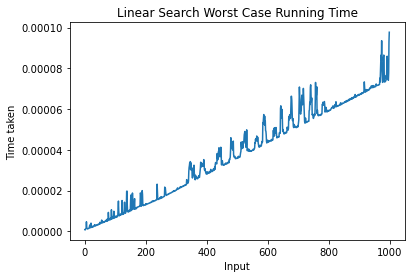

In [35]:
plt.xlabel('Input')
plt.ylabel('Time taken')
plt.title('Linear Search Worst Case Running Time')
plt.plot(n_values, linear_search_worst)

In [36]:
binary_search_worst = worst_case_running_time(binary_search)

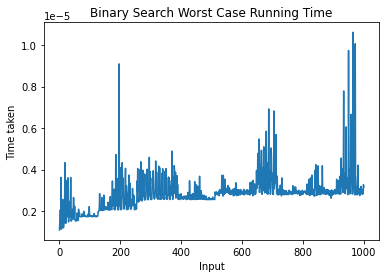

In [37]:
plt.xlabel('Input')
plt.ylabel('Time taken')
plt.title('Binary Search Worst Case Running Time')
plt.plot(n_values, binary_search_worst)

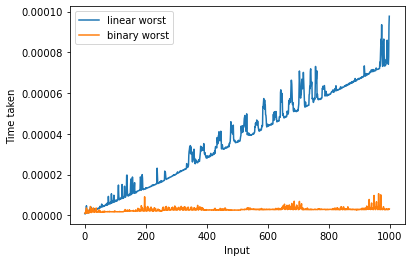

In [38]:
plt.xlabel('Input')
plt.ylabel('Time taken')

plt.plot(n_values, linear_search_worst, label='linear worst')
plt.plot(n_values, binary_search_worst, label='binary worst')
plt.legend()

## Results of Worst Case Run Times


The graphs are as expected. Linear search worst case shows a linear graph representing O(n). The time it takes for the algorithm to search through the sequence correlates with the size of the sequence. As more values to be searched through are added to the sequence, it takes the algorithm longer to search through the sequence. Binary search worst case shows a logarithmic graph representing O(logn). Whenever number of elements in the the sequence doubles, binary search is only carrying out one additional operation. This is why the graph comparing the two searches is the way it is. If the sequence is doubled, the linear search has to double the number of operations. As the number of elements in the sequence increases, the binary search algorithm has a faster runtime. 

## Best Case Run Times

In best case runtime analysis, the lower bound on running time is being calculated. This is the case that causes the least number of operations to be executed by the algorithms.

For the best case run times, the value that the search algorithms are looking for is at different indices:

Firstly, with linear search, as the algorithm always begins at index 0 and then iterates through the list to find the target, the best run time is when the target is at index 0. In this analysis, the variable <code>first_value</code>' is the value the linear search algorithm will be looking for. As the number of operations that is being carried out here is constant (and importantly, does not matter what size the input sequence is), the time complexity is <em>O</em>(1). 

On the other hand, as binary search begins in the middle of the list it is searching in, this is where the value will be for the best run time. Hence, the variable <code>middle_value</code> has been assigned to the middle value of the sequence that the algorithm is searching in and it will also be the target value. Again, in terms of Big-O notation <em>O</em>(1) as the number of operations being carried out is constant.

Again, the Big-O space complexity is <em>O</em>(1) for both algorithms.

In [39]:
#for linear search the best case run time will be when it is the first index.

def best_case_running_time_linear(func):
    
    time_taken = []
    subsequence_list = []
    for i in n_values:
        sum_time = 0
        subsequence_list.append(i)
        for x in range(500):
            first_value = subsequence_list[0]   #value the search algorithm will look for
            start_time = time()
            func(subsequence_list, first_value)
            stop_time = time()
            elapsed_time = stop_time - start_time
            sum_time = sum_time + elapsed_time
        average_time = sum_time / 500
        time_taken.append(average_time)
    return time_taken

In [40]:
linear_search_best = best_case_running_time_linear(linear_search)

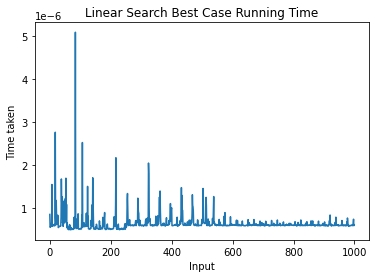

In [41]:
plt.xlabel('Input')
plt.ylabel('Time taken')
plt.title('Linear Search Best Case Running Time')
plt.plot(n_values, linear_search_best)

In [42]:
#for binary, the best case will be in the middle of the list it is searching through.

def best_case_running_time_binary(func):
    time_taken = []
    subsequence_list = []
    for i in n_values:
        subsequence_list.append(i)
        sum_time = 0
        for x in range(500):
            middle_value = ((len(subsequence_list) - 1) // 2)   #value the binary search will look for
            start_time = time()
            func(subsequence_list, middle_value)
            stop_time = time()
            elapsed_time = stop_time - start_time
            sum_time = sum_time + elapsed_time
        average_time = sum_time / 500
        time_taken.append(average_time)
    return time_taken

In [43]:
binary_search_best = best_case_running_time_binary(binary_search)

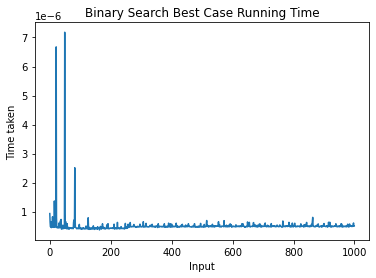

In [44]:
plt.xlabel('Input')
plt.ylabel('Time taken')
plt.title('Binary Search Best Case Running Time')
plt.plot(n_values, binary_search_best)

## Results of Best Case Runtimes

The spikes again are an issue here, particularly with the linear search for sequence length from 0 up until approximately 500. Excluding the spikes in the graphs, we can see that there is relatively clear line representing <em>O</em>(1). This is further exemplified in the next section where we compare the best and worst runtimes of both algorithms on the same graph.

## Mapping the runtimes onto the same graph

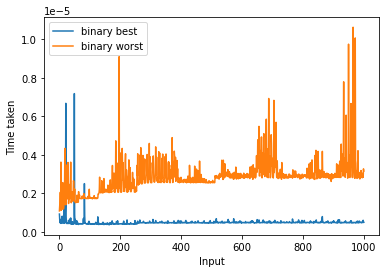

In [45]:
plt.xlabel('Input')
plt.ylabel('Time taken')

plt.plot(n_values, binary_search_best, label='binary best')
plt.plot(n_values, binary_search_worst, label='binary worst')
plt.legend()

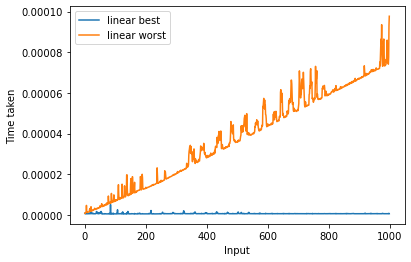

In [46]:
plt.xlabel('Input')
plt.ylabel('Time taken')

plt.plot(n_values, linear_search_best, label='linear best')
plt.plot(n_values, linear_search_worst, label='linear worst')
plt.legend()

These are good visual representation of the time it takes in the worst run time versus the best. Summarising what has already been discussed above, in terms of asymptotic notation, the following is true:

* For both search algorithms runtimes: Ω(1)
* Iterative search algorithm: <em>O</em>(n)
* Binary search algorithm: <em>O</em>(logn)

The graphs clearly show the upper and lower bound run times of their respective algorithms and we can see that the line for the best case runtimes looks more like a constant for both algorithms.

# 4.2 Runtimes being analysed with factorial results

Again, important to note - the code in this section is not described or used in the graphs in section 5. It is just to hear to show that I have implemented the factorial results sequence too as I was unsure what sequence was being asked. The worst and best case runtimes for the search algorithms has been computed with this sequence.

In [74]:
#Sequence to be used is as follows:
n_values = [n for n in range(1, 1000)]
factorial_sequence = [factorial_iterative(n) for n in range(1, 1000)]

## Worst Case Runtimes

In [46]:
value_not_in_list = max(factorial_sequence) + 1     

def worst_case_running_time_factresults(func):
    time_taken = []
    subsequence_list = []
    for i in factorial_sequence: 
        sum_time = 0
        subsequence_list.append(i)
        for x in range(500):
            start_time = time()
            func(subsequence_list, value_not_in_list)
            stop_time = time()
            elapsed_time = stop_time - start_time
            sum_time = sum_time + elapsed_time
        average_time = sum_time / 500
        time_taken.append(average_time)
    return time_taken

In [47]:
linear_search_worst_fact = worst_case_running_time_factresults(linear_search)

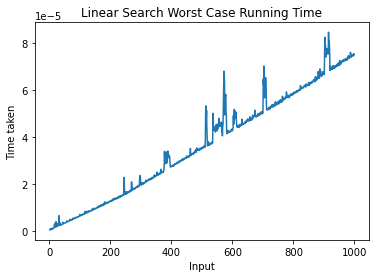

In [48]:
plt.xlabel('Input')
plt.ylabel('Time taken')
plt.title('Linear Search Worst Case Running Time')
plt.plot(n_values, linear_search_worst_fact)

In [49]:
binary_search_worst_fact = worst_case_running_time_factresults(binary_search)

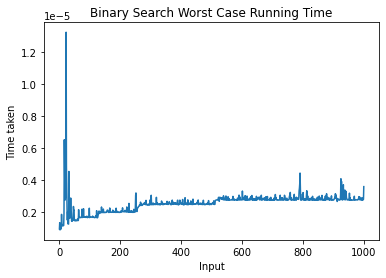

In [50]:
plt.xlabel('Input')
plt.ylabel('Time taken')
plt.title('Binary Search Worst Case Running Time')
plt.plot(n_values, binary_search_worst_fact)

## Best Case Runtimes

In [51]:
#for linear search the best case run time will be when it is the first index.

def best_case_running_time_linear_factresults(func):  
    time_taken = []
    subsequence_list = []
    for i in factorial_sequence:
        sum_time = 0
        subsequence_list.append(i)
        for x in range(500):
            first_value = subsequence_list[0]
            start_time = time()
            func(subsequence_list, first_value)
            stop_time = time()
            elapsed_time = stop_time - start_time
            sum_time = sum_time + elapsed_time
        average_time = sum_time / 500
        time_taken.append(average_time)
    return time_taken

In [52]:
linear_search_best_fact = best_case_running_time_linear_factresults(linear_search)

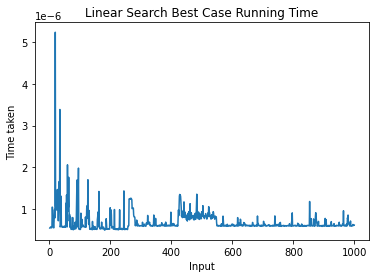

In [53]:
plt.xlabel('Input')
plt.ylabel('Time taken')
plt.title('Linear Search Best Case Running Time')
plt.plot(n_values, linear_search_best_fact)

In [54]:
#for binary, the best case will be in the middle of the list it is searching through.

def best_case_running_time_binary_factresults(func):   
    time_taken = []
    subsequence_list = []
    for i in factorial_sequence:
        subsequence_list.append(i)
        sum_time = 0
        for x in range(500):
            middle_value = ((len(subsequence_list) - 1) // 2)
            start_time = time()
            func(subsequence_list, middle_value)
            stop_time = time()
            elapsed_time = stop_time - start_time
            sum_time = sum_time + elapsed_time
        average_time = sum_time / 500
        time_taken.append(average_time)
    return time_taken

In [55]:
binary_search_best_fact = best_case_running_time_binary_factresults(binary_search)

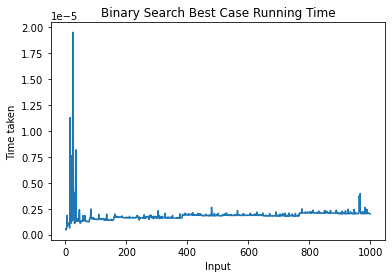

In [56]:
plt.xlabel('Input')
plt.ylabel('Time taken')
plt.title('Binary Search Best Case Running Time')
plt.plot(n_values, binary_search_best_fact)

# Use curve-fitting algorithms to find the equation of the running times obtained from Tasks 2-4.

## Curve Fitting for the Average Runtimes of the Factorial Functions

Equation of line: f(n) = -5.904984568705373e-05 + n * 4.6307939402111607e-07


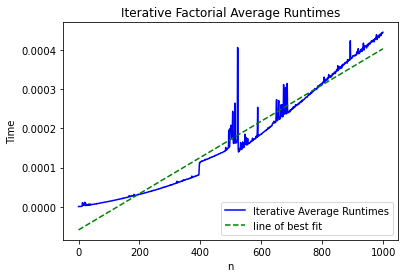

In [58]:
#websites consulted and code adaped from these three websites for this section
#https://www.geeksforgeeks.org/scipy-curve-fitting/
#https://machinelearningmastery.com/curve-fitting-with-python/
#https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly

def objective(x, a, b): 
    return a + (b * x) 

x = np.array([n for n in range(1000)])
  
param, param_cov = curve_fit(objective, x, iterative_average_time_list)
print("Equation of line: f(n) =", param[0],"+ n *", param[1])

ans = param[0] + (x * param[1])
plt.plot(x, iterative_average_time_list, '-', color ='blue', label ="Iterative Average Runtimes") 
plt.plot(x, ans, '--', color ='green', label ="line of best fit") 
plt.legend() 
plt.title("Iterative Factorial Average Runtimes")
plt.xlabel("n")
plt.ylabel("Time")
plt.legend() 

The dashed linear line drawn loosely fits the iterative average runtimes. It appears that for the values 200 to approx
800, the algorithm is working faster than expected and then from 800 onwards, working slower than expected.

The equation of the line represented in Big-O notation is <em>O</em>(n)

Equation of line: f(n) = -6.173564062893722e-05 + n * 5.514861884565471e-07


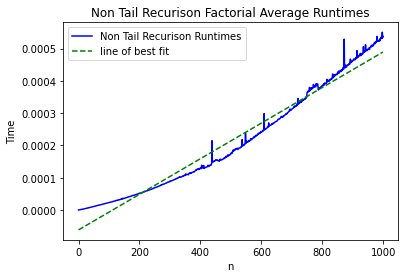

In [60]:
def objective(x, a, b): 
    return a + (b * x) 

x = np.array([n for n in range(1000)])
  
param, param_cov = curve_fit(objective, x, non_tail_average_recursion_time_list)
print("Equation of line: f(n) =", param[0],"+ n *", param[1])

ans = param[0] + (x * param[1])
plt.plot(x, non_tail_average_recursion_time_list, '-', color ='blue', label ="Non Tail Recurison Runtimes") 
plt.plot(x, ans, '--', color ='green', label ="line of best fit") 
plt.legend() 
plt.title("Non Tail Recurison Factorial Average Runtimes")
plt.xlabel("n")
plt.ylabel("Time")
plt.legend() 

Similar graph to the iterative facotorial runtimes graph. Again, the algorithm appears to be running faster than expected for the n values 200 - 800 and slower from 800 onwards.

The equation of the line represented in Big-O notation is <em>O</em>(n)

Equation of line: f(n) = -7.777800152781985e-05 + n * 6.823445348627766e-07


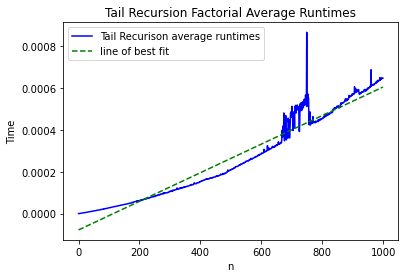

In [61]:
def objective(x, a, b): 
    return a + (b * x) 

x = np.array([n for n in range(1000)])
  
param, param_cov = curve_fit(objective, x, tail_average_recursion_time_list)
print("Equation of line: f(n) =", param[0],"+ n *", param[1])

ans = param[0] + (x * param[1])
plt.plot(x, tail_average_recursion_time_list, '-', color ='blue', label ="Tail Recurison average runtimes") 
plt.plot(x, ans, '--', color ='green', label ="line of best fit") 
plt.legend() 
plt.title("Tail Recursion Factorial Average Runtimes")
plt.xlabel("n")
plt.ylabel("Time")
plt.legend() 

Again, the algorithm appears to be running faster than expected for the n values 200 - 800 and slower from 800 onwards.

The equation of the line represented in Big-O notation is <em>O</em>(n)

# Curve Fitting for the Search Algorithms

Equation of line: f(n) = -4.707904890672338e-07 + n * 7.746441322249862e-08


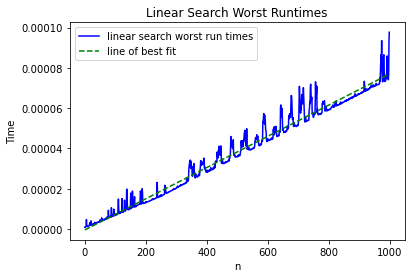

In [62]:
def objective(x, a, b): 
    return a + (b * x) 

x = np.array([n for n in range(1000)])
  
param, param_cov = curve_fit(objective, x, linear_search_worst)
print("Equation of line: f(n) =", param[0],"+ n *", param[1])

ans = param[0] + (x * param[1])
plt.plot(x, linear_search_worst, '-', color ='blue', label ="linear search worst run times") 
plt.plot(x, ans, '--', color ='green', label ="line of best fit") 
plt.legend() 
plt.title("Linear Search Worst Runtimes")
plt.xlabel("n")
plt.ylabel("Time")
plt.legend() 


The linear line drawn fits reasonably well. As the sequence is increasing in length, the run times are increasing proportionally.

The equation of the line represented in Big-O notation is <em>O</em>(n)

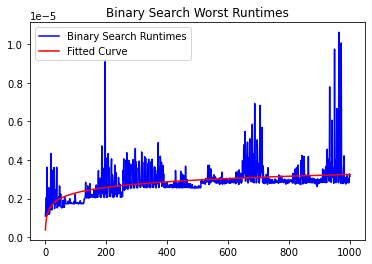

In [64]:
#https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
#adapted an approach from this link for the logarithmic line

def func(x, a, b):
  #return a * np.exp(-b * x) + c
  return a * np.log(b * x)

x = np.array([n for n in range(1, 1001)])   # changed boundary conditions to avoid division by 0
y = binary_search_worst
#yn = y + 0.2*np.random.normal(size=len(x))

popt, pcov = curve_fit(func, x, y)



plt.figure()
plt.title("Binary Search Worst Runtimes")
plt.plot(x, y, '-', color='blue', label="Binary Search Runtimes")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

Important to note here that a logarithmic line has been drawn here.

As the sequence gets larger, the runtime is only marginally longer for each extra element in the sequence.

Big-O notation: <em>O</em>(n)

Equation of line: f(n) = 7.027813335407399e-07 + n * -1.0328157213422579e-10


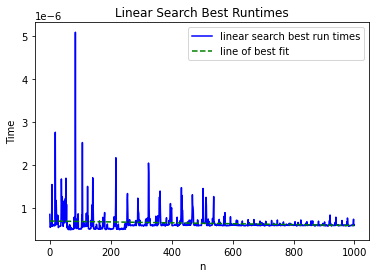

In [65]:
def objective(x, a, b): 
    return a + (b * x) 

x = np.array([n for n in range(1000)])
  
param, param_cov = curve_fit(objective, x, linear_search_best)
print("Equation of line: f(n) =", param[0],"+ n *", param[1])

ans = param[0] + (x * param[1])
plt.plot(x, linear_search_best, '-', color ='blue', label ="linear search best run times") 
plt.plot(x, ans, '--', color ='green', label ="line of best fit") 
plt.legend() 
plt.title("Linear Search Best Runtimes")
plt.xlabel("n")
plt.ylabel("Time")
plt.legend() 

This graph should be a constant value. Regardless of how long the sequence is, the element at index 0 is being returned. The equation of the line suggests that the Big-O notation is <em>O</em>(n) which in theory is incorrect. Due to other processes running in the background or other, the line returned is not constant. 

If the line was a constant, the Big-O notation would be <em>O</em>(1).

Equation of line: f(n) = 5.273072885860737e-07 + n * -4.47563800631425e-11


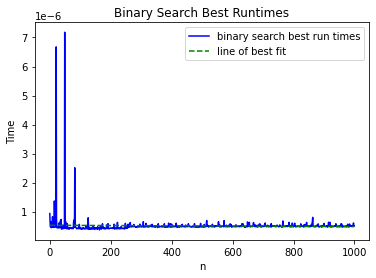

In [66]:
def objective(x, a, b): 
    return a + (b * x) 

x = np.array([n for n in range(1000)])
  
param, param_cov = curve_fit(objective, x, binary_search_best)
print("Equation of line: f(n) =", param[0],"+ n *", param[1])

ans = param[0] + (x * param[1])
plt.plot(x, binary_search_best, '-', color ='blue', label ="binary search best run times") 
plt.plot(x, ans, '--', color ='green', label ="line of best fit") 
plt.legend() 
plt.title("Binary Search Best Runtimes")
plt.xlabel("n")
plt.ylabel("Time")
plt.legend() 

This graph should also display a line f(n) = k, with k being equal to a constant value. Similarly to the linear search algorithm, the equation of the line suggests a Big-O notation, <em>O</em>(n) which is not correct.

If the line represented was a constant, the Big-O notation would be <em>O</em>(1) which would be correct for the best case runtime of binary search algorithms.

# Conclusion

The investigation carried out warrants further investigation. There are a number of drastic increases in the runtime series followed by an immediate return to the underlying level of the runtime series. While, taking the average does help to decrease the number of spikes, they are still noticeable in the graphs. This has been put down to the computer running other processes in the background.

In the analysis of the runtimes for the factorial algorithms, the time to compute the factorial is proportional to the value of n.

Worst case runtimes of the search algorithms:
* In binary search, the operations carried out is only increasing by one if the sequence doubles. This marginal increase in runtime for each element added to the list is represented by the logarithmic line.
* In linear search, the operations carried out increases proportionally to the size of the sequence - represented by the linear line.

Best case runtime of the search algorithms:
* In linear search, it is returning the first element and in binary search it is always returning the middle value. The graphs should have displayed a constant value (as the number of operations being carried out is not changing) which was not the case. This calls for further investigation.